In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
img = cv2.imread("C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\test_images\\maks_test.jpg")
img.shape

(5184, 3880, 3)

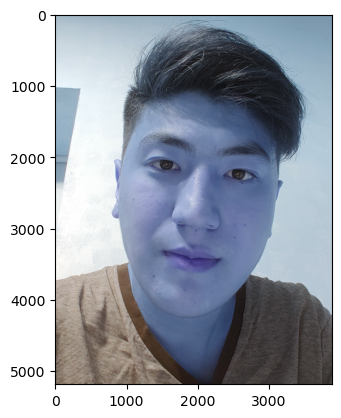

In [10]:
plt.imshow(img)

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(5184, 3880)

In [12]:
gray

array([[180, 181, 183, ..., 158, 160, 160],
       [181, 182, 183, ..., 158, 160, 160],
       [181, 182, 184, ..., 156, 159, 159],
       ...,
       [139, 138, 135, ...,  63,  59,  59],
       [135, 134, 133, ...,  57,  53,  53],
       [133, 132, 129, ...,  52,  49,  50]], dtype=uint8)

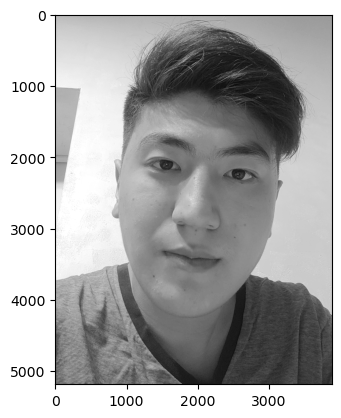

In [13]:
plt.imshow(gray,cmap ='gray')

In [19]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\77081\Code\Deep_learning_photo\model\opencv\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\77081\Code\Deep_learning_photo\model\opencv\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 448,  988, 2969, 2969]])

In [20]:
(x,y,w,h) = faces[0]
x,y,w,h

(448, 988, 2969, 2969)

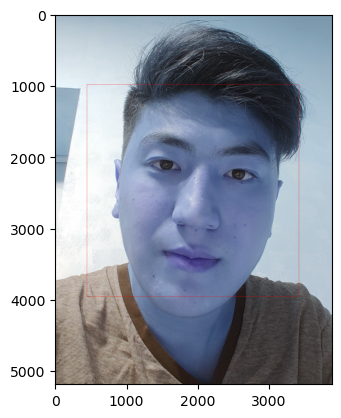

In [21]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

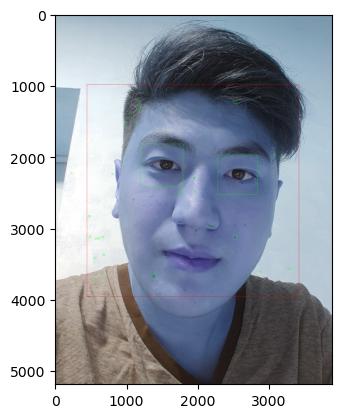

In [22]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

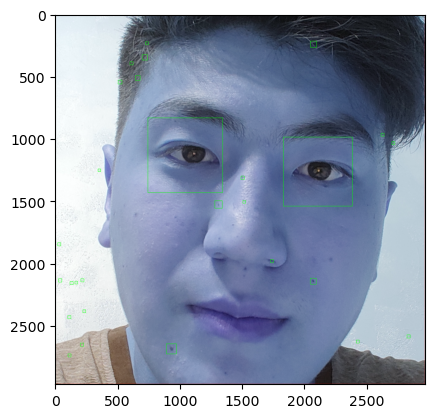

In [23]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [24]:
def get_cropped_image_if_2_eyes (image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

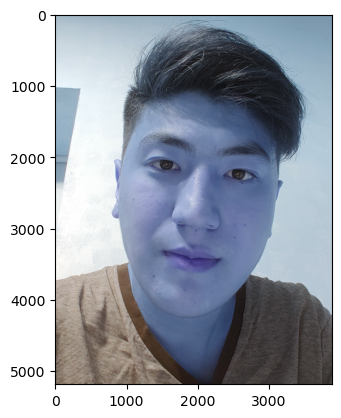

In [25]:
original_image = cv2.imread('C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\test_images\\maks_test.jpg')
plt.imshow(original_image)

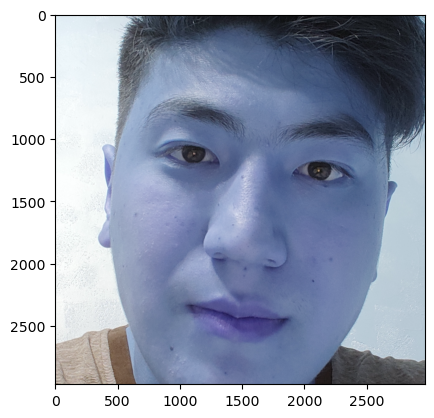

In [26]:
cropped_image = get_cropped_image_if_2_eyes('C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\test_images\\maks_test.jpg')
plt.imshow(cropped_image)

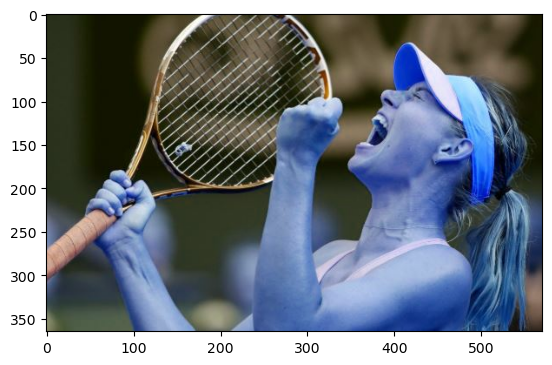

In [27]:
org_image_obstructed = cv2.imread('C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\test_images\\sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [29]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\test_images\\sharapova2.jpg')
cropped_image_no_2_eyes

In [45]:
path_to_data = 'C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\dataset\\'
path_to_cr_data = 'C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\dataset\\cropped\\'

In [32]:
import os 
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [33]:
img_dirs

['C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\dataset\\gal_gadot',
 'C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\dataset\\penelope_cruz',
 'C:\\Users\\77081\\Code\\Deep_learning_photo\\model\\dataset\\taylor_swift']

In [34]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
{
    'gal'
}

In [48]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] =[]
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder =path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ',cropped_folder)
                
            cropped_file_name = celebrity_name +str(count)+ ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

gal_gadot
penelope_cruz
Generating cropped images in folder:  C:\Users\77081\Code\Deep_learning_photo\model\dataset\cropped\penelope_cruz
taylor_swift
Generating cropped images in folder:  C:\Users\77081\Code\Deep_learning_photo\model\dataset\cropped\taylor_swift
